# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [5]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [6]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [7]:
#  1. Get the total rides for each city type
sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]


In [8]:
# 2. Get the total drivers for each city type
sum_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]


In [9]:
#  3. Get the total amount of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]


In [10]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = sum_fares_by_type / sum_rides_by_type


In [11]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = sum_fares_by_type / sum_drivers_by_type


In [12]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({'type': ['Rural', 'Suburban', 'Urban'],
                                 'Total Rides': [sum_rides_by_type["Rural"], sum_rides_by_type["Suburban"], sum_rides_by_type["Urban"]],
                                 'Total Drivers': [sum_drivers_by_type["Rural"], sum_drivers_by_type["Suburban"], sum_drivers_by_type["Urban"]],
                                 'Total Fares': [sum_fares_by_type["Rural"], sum_fares_by_type["Suburban"], sum_fares_by_type["Urban"]],
                                 'Average Fare per Ride': [average_fare_per_ride["Rural"], average_fare_per_ride["Suburban"], average_fare_per_ride["Urban"]],
                                 'Average Fare per Driver': [average_fare_per_driver["Rural"], average_fare_per_driver["Suburban"], average_fare_per_driver["Urban"]]})
    
pyber_summary_df = pyber_summary_df.set_index('type')
    
pyber_summary_df 

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [13]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [14]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)



pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [15]:
# 1. Read the merged DataFrame
#Merge DataFrames
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_date_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]

pyber_date_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [27]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_date_df = pyber_date_df.reset_index()
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [31]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_date_df = pyber_date_df.pivot(index='date', columns='type', values='fare')

pyber_date_df

KeyError: 'type'

In [32]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_selected_dates_df = pyber_date_df.loc['2019-01-01':"2019-04-29",:]
                                                                             
pyber_selected_dates_df.head(10)

type,index,date,Rural,Suburban,Urban


In [33]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_selected_dates_df.index = pd.to_datetime(pyber_selected_dates_df.index)


In [34]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_selected_dates_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     0 non-null      int64  
 1   date      0 non-null      object 
 2   Rural     0 non-null      float64
 3   Suburban  0 non-null      float64
 4   Urban     0 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 0.0+ bytes


In [35]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_fares_week_df = pyber_selected_dates_df.resample("W").sum()

sum_fares_week_df.head(10)

type,index,date,Rural,Suburban,Urban


ValueError: zero-size array to reduction operation fmin which has no identity

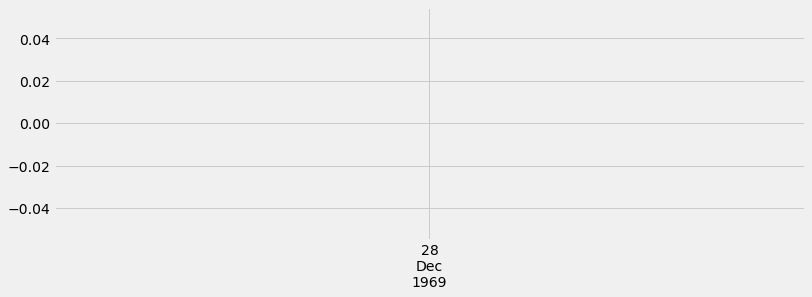

In [36]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

import numpy as np
ax = sum_fares_week_df.plot(xticks=sum_fares_week_df.index, figsize=(12,4))

# Set the x and y label
ylab = ax.set_ylabel('Fare ($USD)')
ax.set_xlabel(None)
# Create a title. 
ax.set_title("Total Fare by City Type")
plt.legend(loc='center', title='type')

# Save Figure
plt.savefig("PyBer_fare_summary.png")


plt.show()